In [43]:
import os, json
os.chdir(r'D:\0Business\ML\WOS\Stars')

from Models.Engine import EmbedSentences, Similarity

data = open("DataBank/dataset_doc2vec.json", "r", encoding="utf8").read()
data = json.loads(data)
query = data["query"]

paragraphs = data["data"]
paragraphs = [paragraph['text'] for paragraph in paragraphs]

relevance = data["data"]
relevance = [item['relevance'] for item in relevance]


In [44]:
embeddingList = EmbedSentences([query] + paragraphs)

In [45]:
e_query = embeddingList[0] # Embedding of the query
e_paragraphs = embeddingList[1:] # Embedding of paragraphs

e_high = [embeddingList[i] for i in data["overview"]["example_ranking"]["high"]]
e_medium = [embeddingList[i] for i in data["overview"]["example_ranking"]["medium"]]
e_low = [embeddingList[i] for i in data["overview"]["example_ranking"]["low"]]
e_none = [embeddingList[i] for i in data["overview"]["example_ranking"]["none"]]

e_high_s = [Similarity(e_query, i) for i in e_high]
e_medium_s = [Similarity(e_query, i) for i in e_medium]
e_low_s = [Similarity(e_query, i) for i in e_low]
e_none_s = [Similarity(e_query, i) for i in e_none]

In [46]:
import numpy as np
from scipy.stats import gaussian_kde

def KDE(x, numbers):
    kde = gaussian_kde(numbers)
    y = kde(x)
    y = y / np.trapz(y, x)
    return y

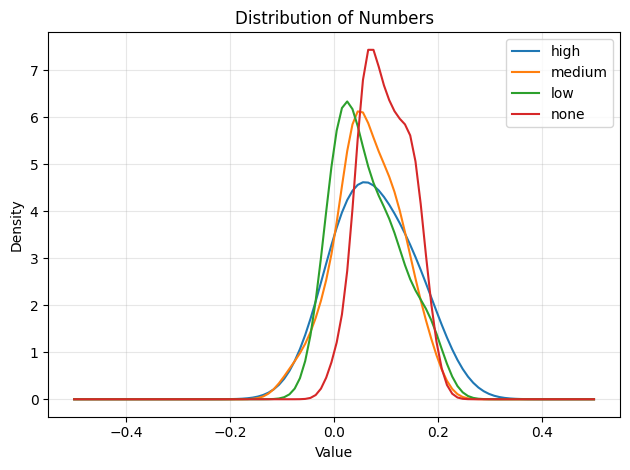

In [47]:
# try to figure out whether cosine similarity has a trend to follow
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.5, 0.5, 100)
kde_high = KDE(x, e_high_s)
kde_medium = KDE(x, e_medium_s)
kde_low = KDE(x, e_low_s)
kde_none = KDE(x, e_none_s)

plt.plot(x, kde_high, label="high") 
plt.plot(x, kde_medium, label="medium") 
plt.plot(x, kde_low,  label="low") 
plt.plot(x, kde_none, label="none") 

plt.xlabel('Value') 
plt.ylabel('Density')
plt.title('Distribution of Numbers')
plt.legend()

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# and it seems there is none

([], [])

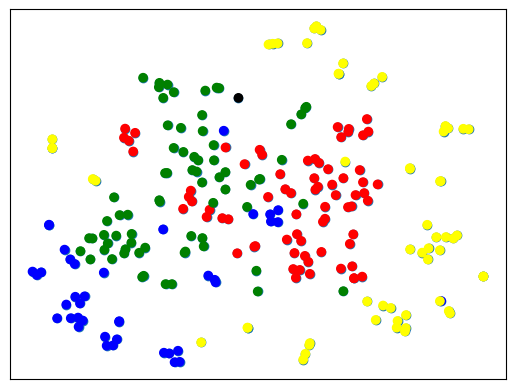

In [48]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Sample embeddings list
embeddings = embeddingList

# Reduce to 2D
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the 2D embeddings
x_coords = embeddings_2d[:, 0]
y_coords = embeddings_2d[:, 1]
plt.scatter(x_coords, y_coords)

# Map tags to colors
colors = {"high": "red", "medium": "green", "low": "blue", "none": "yellow", "query": "black"}
tags = ["query"] + relevance
colors_mapped = [colors[tag] for tag in tags] 

# Plot with colors
x_coords = embeddings_2d[:,0]
y_coords = embeddings_2d[:,1]
plt.scatter(x_coords, y_coords, label=tags, c=colors_mapped)
plt.xticks([])
plt.yticks([])

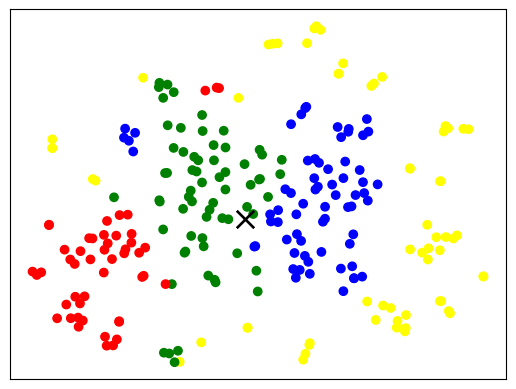

In [49]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

# Sample embeddings
embeddings = embeddingList

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings) 

# Cluster using K-meansg
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(embeddings)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Map cluster labels to colors
colors = ["red", "green", "blue", "yellow"]
colors_mapped = [colors[i] for i in clusters]

# Plot the clusters 
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=colors_mapped)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, c='black')

plt.xticks([])
plt.yticks([])
plt.show()